In [154]:
import pandas as pd

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import StratifiedKFold

In [156]:
load_path = 'D:\EECE499\Features\\'
#load_path = '..\..\\'

In [157]:
Features = pd.read_excel(load_path + 'Features.xlsx')

In [158]:
def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1) 
    z = [x for _, x in sorted(zipped_pairs)] 
    return z

# Arousal

In [159]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -5].values

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [161]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [162]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [163]:
y_pred = classifier.predict(X_test)

In [164]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [165]:
confusion_mtrx

array([[ 0,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  3,  0,  4,  4,  0],
       [ 0,  0,  2,  3, 10,  5,  0],
       [ 0,  0,  3,  8, 25, 10,  0],
       [ 0,  3,  1, 11, 43, 16,  0],
       [ 0,  0,  3, 10, 19, 10,  2],
       [ 0,  0,  0,  1,  7,  8,  0]], dtype=int64)

In [166]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [167]:
print(accuracy, mae, rmse)

0.29577464788732394 1.1220657276995305 2.3051643192488265


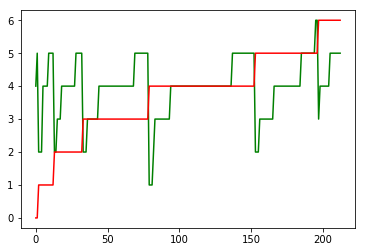

In [168]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

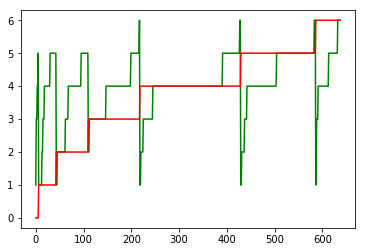

In [169]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
F

Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 fe

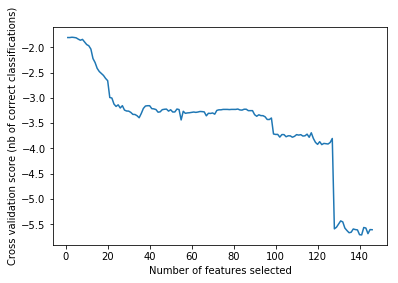

In [170]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=10000)

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='neg_mean_squared_error', verbose=1)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [171]:
rfecv.ranking_

array([132, 133,   6,   1,   1,  34, 130,   3, 112, 144, 135, 143,   2,
        49,  48,  26,  25,  50,  36,  37,  57,  88,  21,  22,  27,  28,
        40,  58,  77, 109, 138,  94, 123, 128,  71,  90,  62,  13,  17,
        76, 102, 141,  95, 125, 124,  81, 115,  33,  12,  10,  84, 105,
       134,  96, 114, 119,  52,  91,  38,  15,  35,  85, 108, 136,  93,
       118, 120,  70, 103,  46,  11,  61,  83, 101, 137, 100, 129, 127,
        23, 113,  39,   9,  53,  82, 107, 139,  99, 121, 122,  72,  74,
        41,   8,  24,  79, 110, 140,  97, 126, 131,  75,  98,  43,   5,
        45,  78, 106, 142,  92, 116, 117,  73, 111,  44,   1,   7,  68,
        65,  32,  20, 104,  86,  69,  51,  47,  14,  16,  87,  64,  66,
        63,   4,  19,  29,  31,  30,  18,  67,  56,  55,  89,  42,  80,
        54,  59,  60])

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

#classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=10000, multi_class='auto')
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=10000)
rfe = RFE(classifier, rfecv.n_features_, step=1, scoring='neg_mean_squared_error', cv=StratifiedKFold(2))
rfe = rfe.fit(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'scoring'

In [ ]:
y_pred = rfe.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [ ]:
print(accuracy, mae, rmse)

In [ ]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

# Engaging

In [ ]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -4].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [ ]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=10000)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [ ]:
confusion_mtrx

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [ ]:
print(accuracy, mae, rmse)

In [ ]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

In [ ]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [ ]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=10000)

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='neg_mean_squared_error', verbose=1)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.ranking_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

#classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=10000, multi_class='auto')
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=10000)
rfe = RFE(classifier, rfecv.n_features_, step=1, scoring='neg_mean_squared_error', cv=StratifiedKFold(2))
rfe = rfe.fit(X_train, y_train)

In [ ]:
y_pred = rfe.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [ ]:
print(accuracy, mae, rmse)

In [ ]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

# Familiarity

In [ ]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -3].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [ ]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=10000)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [ ]:
confusion_mtrx

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [ ]:
print(accuracy, mae, rmse)

In [ ]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

In [ ]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [ ]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=10000)

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='neg_mean_squared_error', verbose=1)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.ranking_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

#classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=10000, multi_class='auto')
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=10000)
rfe = RFE(classifier, rfecv.n_features_, step=1, scoring='neg_mean_squared_error', cv=StratifiedKFold(2))
rfe = rfe.fit(X_train, y_train)

In [ ]:
y_pred = rfe.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [ ]:
print(accuracy, mae, rmse)

In [ ]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

# Liking

In [ ]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -2].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [ ]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=10000)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [ ]:
confusion_mtrx

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [ ]:
print(accuracy, mae, rmse)

In [ ]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

In [ ]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [ ]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=10000)

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='neg_mean_squared_error', verbose=1)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.ranking_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

#classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=10000, multi_class='auto')
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=10000)
rfe = RFE(classifier, rfecv.n_features_, step=1, scoring='neg_mean_squared_error', cv=StratifiedKFold(2))
rfe = rfe.fit(X_train, y_train)

In [ ]:
y_pred = rfe.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [ ]:
print(accuracy, mae, rmse)

In [ ]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

# Valence

In [ ]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [ ]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=10000)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [ ]:
confusion_mtrx

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [ ]:
print(accuracy, mae, rmse)

In [ ]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

In [ ]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [ ]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=10000)

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='neg_mean_squared_error', verbose=1)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.ranking_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

#classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=10000, multi_class='auto')
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=10000)
rfe = RFE(classifier, rfecv.n_features_, step=1, scoring='neg_mean_squared_error', cv=StratifiedKFold(2))
rfe = rfe.fit(X_train, y_train)

In [ ]:
y_pred = rfe.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [ ]:
print(accuracy, mae, rmse)

In [ ]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')